In [1]:
import os
import subprocess
import utils
%matplotlib inline

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


Creating the dataset...
- done.
Starting evaluation
- Eval metrics : accuracy: 0.892 ; loss: 0.546
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   All
Actual                                                 
0.0        536   17    7    8    6    4    9    2   589
1.0         19  468   14    0   11    4    5   16   537
2.0          6    4  493    5    7    4    2    9   530
3.0         18    7    3  492    4    7    6    3   540
4.0          8    7   17    0  505    3    6    7   553
5.0         17    2    8   11    6  485   10    3   542
6.0         20   19   19   10    9   12  454   13   556
7.0          7    9   15    5    8    4   17  485   550
All        631  533  576  531  556  523  509  538  4397


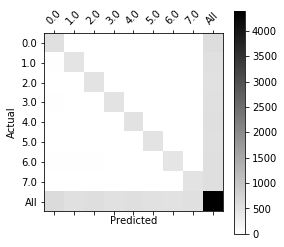

In [2]:
%run evaluate.py --data_dir data/128x128_specs --model_dir experiments/fusion --save_plot True

In [ ]:
%run evaluate.py --data_dir data/128x128_specs_tmp --model_dir experiments/data_aug

In [ ]:
# path = "test_songs/enc_althphp.mp3" #I am not sure
# path = "test_songs/000190.mp3" # Def Folk
# path = "test_songs/borrtex_class.mp3" # classical (Instrumental)
# path = "test_songs/folk_intnl.mp3" #Intnl; folk
# path = "test_songs/sidipe_african.mp3" #African
#path = "test_songs/ineed_love_pop.mp3" #Fails
path = "test_songs/hicham_electronic.mp3"


out_path = "data/128x128_specs/tmp_specs"
utils.preprocess_track_for_classification(path, out_path)
%run classify_genre.py --model_dir experiments/fusion --data_dir data/128x128_specs